# Eigenvalues and Eigenvectors

This chapter will revisit another significant topic that you would have seen in a typical linear algebra course. During my class experience, I recall going through mountainous piles of loose-leaf paper, solving characteristic polynomials to find eigenvectors of 2x2 matrices, without any motivation for the practice. 

Eigenvalues and vectors turn out to have myriad applications, and hopefully the content here will help remind you how these things work and provide a context to understand them when they show up elsewhere.

### Python Setup

In [2]:
# Render MPL figures within notebook cells
%matplotlib inline

# Import python libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
# Configure some defaults for plots
rcParams['font.size'] = 16
# rcParams['figure.figsize'] = (10, 3)

In [4]:
# Set Numpy's random number generator so the same results are produced each time the notebook is run
np.random.seed(0)

### A Quick Review

It's helpful to start with a geometric picture. If you multiply a vector with a square matrix, the output will be another vector in the same space, but in general will "point" in another direction. For any matrix $A$, there are a set of special vectors $v$ whose output is a scaled version of the input:

<img src='img/eig.png' style='height: 200px'>

This relationship is expressed mathematically as 

<center>
    $Av = \lambda v$
</center>

where $v$ is called an **eigenvector** and the scaling factor $\lambda$ is the associated **eigenvalue**. To emphasize, since the output has the same dimensions as the input, eigenvectors only make sense in the context of square matrices. A square matrix of dimension $n$ may have up to $n$ eigenvectors.

#### Finding Eigenvectors and Eigenvalues

Given the definition of an eigenpair is $Av=\lambda v$, it has to be true that $(A-\lambda I)v=0$. Referring back to the previous chapter, this means that $v$ is in the nullspace of the matrix $M = (A - \lambda I)$. This, in turn, means that $M$ **has** non-zero vectors in its nullspace, which means that the determinant must be zero.

This is where in a linear algebra class, one would start writing out the determinants of matrices and solving for values of $\lambda$ which produce a zero determinant. In practice, this is not an efficient way to find eigenpairs. Numpy uses the LAPACK routine `geev`:

In [5]:
A = np.diag([1, 2, 3, 4, 5])
A

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [6]:
λ, v = np.linalg.eig(A)

# λ contains the eigenvalues
λ

array([1., 2., 3., 4., 5.])

In [7]:
# v contains the eigenvectors as columns
v

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Time Dynamics

One of my favorite applications of eigenvectors is with systems that evolve over time - think object tracking or evolution of financial portfolios, etc. Any kind of time series data.

In this context, a vector is a list of the parameters that describe the state of your system at a particular time. A nice, concrete example of "the state" from classical mechanics would be the position, velocity, and acceleration of an object. In finance it could be the dollar amounts in a list of assets.

The matrix $A$ describes the process that updates the state from time $t$ to $t+1$:  
<br>
<center>
    $x(t+1) = Ax(t)$
</center>
<br>
It's possible to describe the state at an arbitrary time as a function of the input state using entirely terms that depend on the eigenvectors and eigenvalues:
<br>
<center>
    $x(t) = (\lambda_1^t v_1 + \ldots)x(0)$
</center>
<br>

Now, the $\ldots$ above are hiding an ugly mess involving binomial coefficients and such - my aim is to simply highlight that every term contains one eigenvector scaled by something that looks like the matching eigenvalue raised to a power which grows with time. In special cases, if $A$ is diagonalizable, then the terms in the equation above becomes extremely simple:  
<br>
<center>
    $x(t) = (\lambda_1^t v_1 + \lambda_2^t v_2 + \ldots)x(0) = \sum_{i=1}^n \lambda_i^t v_i x(0)$
</center>
<br>

First of all, how amazing is it that eigenvectors appear in this setting at all! These weird geometric oddities can describe how systems evolve in time from any starting state. Second, and just as amazing, this structure means that linear systems can only evolve in time in a few specific ways:

<img src='img/dyn_eig.png' style='height: 200px'>

1. Terms associated with eigenvalues of magnitude = 1 stay the same over time
2. Terms associated with eigenvalues of magnitude < 1 decay over time
3. Terms associated with eigenvalues of magnitude > 1 stay grow exponentially over time

For a matrix with all real entries, it's possible to have complex eigenvalues and eigenvectors. Complex values will be associated with oscillating behavior, shown by dashed lines in the image above. The asymptotic behavior is still determined by the magnitude of the eigenvalue. 

### Markov Processes

A fun example to show this idea is that of **Markov Processes**. In a Markov process, at any point in time we can be in one of several states. Each time step, we can transition to one of the other states with some probability based on where we are currently. An example system could be an employee - at any point the employee could be thinking, working, or idle:

<img src='img/markov_1.png' style='height: 200px'>

If we ran a simulation using coin flips to decide if we change states, we would end up with a sequence like  

*idle - working - idle - thinking - thinking - working - thinking...*  

This sequence is called a **Markov Chain**. A classic question one might ask with a model like this is "what is the probability at any time that the employee is producing results?"

Markov processes are linear. The vector $x$ represents the probability at time $t$ that we are in state 1 through state $n$. The square matrix $P$ is called the state transition matrix, and the entry $p_{i,j}$ is the probability of moving from state $j$ to state $i$:

<img src='img/markov_matrix.png' style='height: 200px'>

Ok, let's do an example. When I was in high school, I had a particularly boring hamster that had a set routine: *sleep - run on wheel - eat - sleep...*

Here's the Markov process for my hamster:

<img src='img/hamster.png' style='height: 200px'>

In [8]:
# The associated transition matrix is P
P = np.array([[0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])

λ, v = np.linalg.eig(P)

In [9]:
λ

array([-0.5+0.8660254j, -0.5-0.8660254j,  1. +0.j       ])

In [10]:
v

array([[ 0.57735027+0.j ,  0.57735027-0.j , -0.57735027+0.j ],
       [-0.28867513-0.5j, -0.28867513+0.5j, -0.57735027+0.j ],
       [-0.28867513+0.5j, -0.28867513-0.5j, -0.57735027+0.j ]])

We have one eigenvalue of 1, corresponding to an eigenvector with equal weighting on all three states. The remaining eigenvectors form a complex conjugate pair - we would expect a complex value to appear given the clear, periodic nature of the example.

We can look at another transition matrix, this time with all real eigenvectors. For sake of concreteness, this matrix could correspond to a chemical reaction, where the probabilities are now concentrations of mass in different reactants:

In [11]:
# Construct an example where all the non-unity eigenvalues are associated with decaying exponentials

P = np.array([[1, 0.05, 0.0],
              [0, 0.95, 0.2],
              [0, 0.00, 0.8]])

λ, v = np.linalg.eig(P)

In [12]:
λ

array([1.  , 0.95, 0.8 ])

In [13]:
v

array([[ 1.        , -0.70710678,  0.19611614],
       [ 0.        ,  0.70710678, -0.78446454],
       [ 0.        ,  0.        ,  0.58834841]])

Before reading further, try to inspect the eigenvalues and eigenvectors and predict what this system will do over time. Does your prediction make sense if you try to imagine the process by looking at the transition matrix?

Ok, let's run a simulation to see what this does over time:

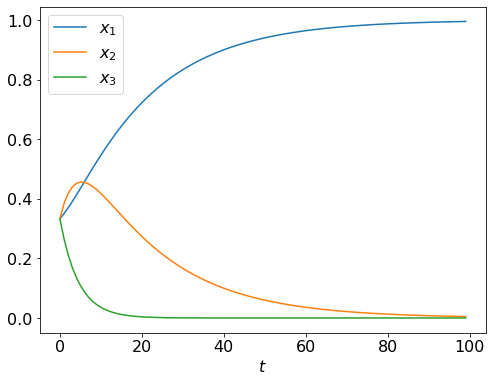

In [17]:
# Simulate the evolution of the system, starting from a uniform state
T = 100
x = np.ones((3, T)) / 3.

for t in np.arange(1, T):
    x[:, t] = P @ x[:, t-1]

plt.figure(figsize=(8, 6))
plt.plot(x.T)
plt.legend(labels=['$x_1$', '$x_2$', '$x_3$'], loc='upper left')
plt.xlabel('$t$')
plt.show()

We have two eigenvalues with magnitude less than 1, so any contribution to the initial state from those eigenvectors will dampen out over time. The one eigenvalue with magnitude 1 will dominate over time - this eigenvalue corresponds to the eigenvector having 100% occupation of state 1, so eventually the probability of being in state 1 approaches 100%.

Markov transition matrices, because of the structure imposed to contain probabilities summing to 1, will always have an eigenvalue with magnitude 1. This idea is one of the foundational principles of Google's PageRank algorithm. Thus, whether you like it or not, this theory impacts your life every single day!